# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from scipy.stats import linregress
from citipy import citipy
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#city = "London"
# city sample test the url
#query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
#query_url

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Utilize citipy to lookup for city names with geo-coordinates
# Lists of lat_lons and cities
geocoords = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lons = np.random.uniform(low=-180.000, high=180.000, size=1200)
geocoords = zip(lats, lons)

#Identify nearest city for each lat, lon coordinate
for geocoord in geocoords:
    city = citipy.nearest_city(geocoord[0], geocoord[1]).city_name
    
#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# set lists for the dataframe

city_apd = []
cloudiness = []
dates = []
humidities = []
lats = []
lons = []
max_temps = []
wind_speeds = []
countries = []

# Initialize
count = 0
set_num = 1

print("\nBeginning of Data Retrieval\n------------------------------")
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        # A set processing 49 cities

        city_apd.append(city)
 
        print(f"Processing Record {count} of Set {set_num} | {city}")
    
# Every set has 50 records, from 0 to 49             
        if count > 48:
            count = 0
            set_num +=1
        else:    
            count +=1


    except Exception:
        print("City not found. Skipping...")
    
print("------------------------------\nEnd of Data Retrieval\n------------------------------")


Beginning of Data Retrieval
------------------------------
Processing Record 0 of Set 1 | okhotsk
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | arlit
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | san cristobal
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | huanta
Processing Record 8 of Set 1 | huron
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | tariba
Processing Record 12 of Set 1 | soyo
City not found. Skipping...
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | tambacounda
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | aleksandro-nevskiy
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | vilhena
City not found. Skipping...
Processing Record 21 of Set 1 | 

Processing Record 31 of Set 4 | ust-kulom
Processing Record 32 of Set 4 | gloucester
Processing Record 33 of Set 4 | khatanga
Processing Record 34 of Set 4 | sayansk
Processing Record 35 of Set 4 | sri aman
Processing Record 36 of Set 4 | asau
Processing Record 37 of Set 4 | riyadh
Processing Record 38 of Set 4 | calvinia
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | klyuchi
Processing Record 41 of Set 4 | scarborough
Processing Record 42 of Set 4 | bhera
City not found. Skipping...
Processing Record 43 of Set 4 | mersing
Processing Record 44 of Set 4 | kosonsoy
Processing Record 45 of Set 4 | nhulunbuy
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | kosh-agach
Processing Record 48 of Set 4 | nadadores
Processing Record 49 of Set 4 | ngunguru
Processing Record 0 of Set 5 | alyangula
Processing Record 1 of Set 5 | atlantic beach
Processing Record 2 of Set 5 | ozieri
City not found. Skipping...
Processing Record 3 of Set 5 | vila
Processing R

Processing Record 18 of Set 8 | norsup
Processing Record 19 of Set 8 | las vegas
Processing Record 20 of Set 8 | illapel
Processing Record 21 of Set 8 | surab
Processing Record 22 of Set 8 | reconquista
Processing Record 23 of Set 8 | karratha
City not found. Skipping...
Processing Record 24 of Set 8 | steenwijk
Processing Record 25 of Set 8 | coalville
Processing Record 26 of Set 8 | verkhnevilyuysk
Processing Record 27 of Set 8 | elkton
Processing Record 28 of Set 8 | oriximina
Processing Record 29 of Set 8 | kirakira
Processing Record 30 of Set 8 | behshahr
Processing Record 31 of Set 8 | los lunas
Processing Record 32 of Set 8 | ekhabi
Processing Record 33 of Set 8 | coihaique
Processing Record 34 of Set 8 | nanga eboko
Processing Record 35 of Set 8 | lengshuitan
Processing Record 36 of Set 8 | phrae
Processing Record 37 of Set 8 | katsuura
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | rio claro
Processing Record 40 of Set 8 | constitucion
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = pd.read_csv('../output_data/cities.csv')
#weather_dict

In [6]:
# create dictionary for establishing dataframe
weather_dict = {
    "City":city_apd,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lons,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

#weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,okhotsk,100,RU,1602420895,77,59.38,143.30,6.53,10.27
1,georgetown,20,MY,1602420309,83,5.41,100.34,28.00,2.10
2,arlit,65,NE,1602420743,9,18.74,7.39,38.57,1.96
3,te anau,100,NZ,1602420896,91,-45.42,167.72,9.27,1.35
4,tuktoyaktuk,100,CA,1602420518,97,69.45,-133.04,-2.35,11.28


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Creat DataFrame where humidity is under 100%. In other words, remove where the humidity > 100%
weather_under100_df = weather_df[weather_df["Humidity"]<= 100]
weather_under100_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,okhotsk,100,RU,1602420895,77,59.38,143.30,6.53,10.27
1,georgetown,20,MY,1602420309,83,5.41,100.34,28.00,2.10
2,arlit,65,NE,1602420743,9,18.74,7.39,38.57,1.96
3,te anau,100,NZ,1602420896,91,-45.42,167.72,9.27,1.35
4,tuktoyaktuk,100,CA,1602420518,97,69.45,-133.04,-2.35,11.28


In [8]:
#  Get the indices of cities that have humidity over 100%.

index = weather_df[weather_df["Humidity"]> 100].index

#  Make a new DataFrame equal to the city weather data to drop all humidity outliers by index.
#  Passing "inplace=False" will make a copy of the city weather data DataFrame, which we call "clean_weather_df"

clean_weather_df = weather_df.drop(index, inplace=False)

clean_weather_df["Humidity"].describe()


count    477.000000
mean      71.016771
std       22.326731
min        7.000000
25%       60.000000
50%       77.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
# Print clean weather dataframe by humidity in descending order to make sure the humidity max is not over 100%

clean_weather_df.sort_values(by=["Humidity"], inplace=True, ascending=False)

clean_weather_df.head()
 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
24,thompson,75,CA,1602420353,100,55.74,-97.86,1.00,3.10
81,san patricio,1,US,1602420561,100,28.02,-97.52,25.00,3.10
253,alofi,45,NU,1602420938,100,-19.06,-169.92,22.00,6.20
119,ulladulla,90,AU,1602420915,100,-35.35,150.47,16.11,2.60
436,healdsburg,90,US,1602420972,100,38.61,-122.87,14.44,2.14


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

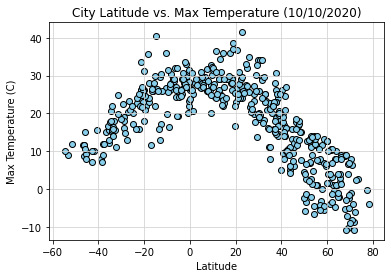

In [10]:
# create graph for latitude vs. Temperature
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

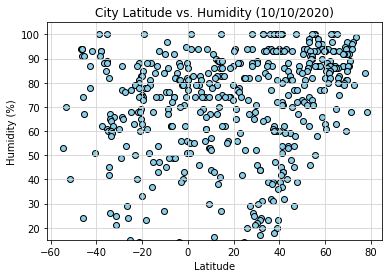

In [11]:
# create graph for latitude vs. humidity
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

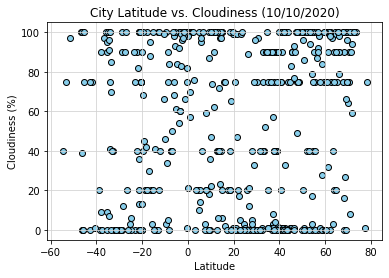

In [12]:
# create graph for latitude vs. cloudiness
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

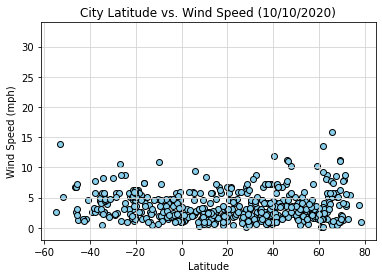

In [13]:
# Create graph for latitude vs. wind speed
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_wind.png")
plt.show()

## Linear Regression

In [14]:
# Create Northern Hemisphere DataFrame
northern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) > 0, :]
# Create Southern Hemisphere DataFrame
southern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.5x + 35.19
The r-squared is: -0.8550075723945355
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


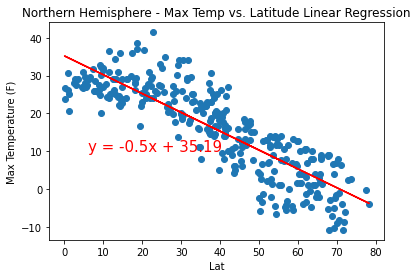

In [15]:
# # Create Northern Hemisphere DataFrame
# northern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) > 0, :]

# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("fig_north_temp_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.39x + 30.05
The r-squared is: 0.7762845981948274
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


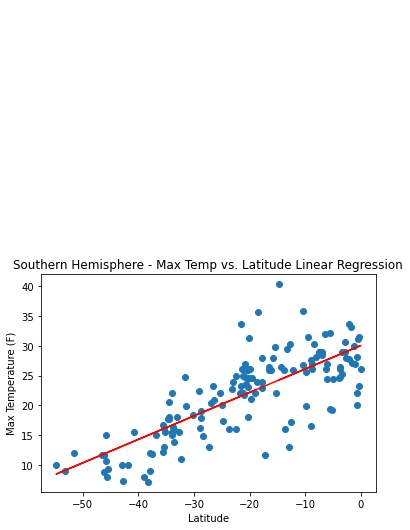

In [16]:
# # Create Southern Hemisphere DataFrame
# southern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) < 0, :]

# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("fig_south_temp_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 59.41
The r-squared is: 0.30484017447420625
The regression does not display much of a correlation between the data sets.


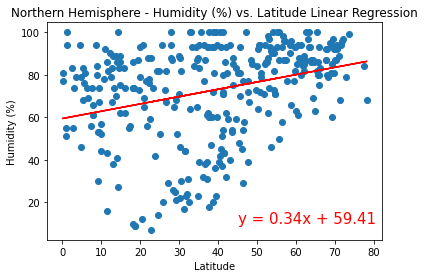

In [17]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("fig_north_hum_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 66.54
The r-squared is: -0.022325940583918555
The regression does not display much of a correlation between the data sets.


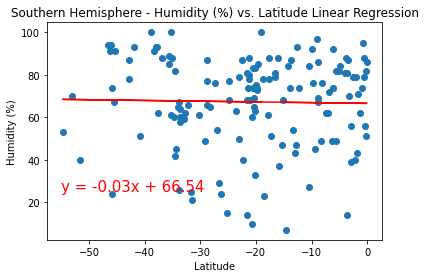

In [18]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_north_hum_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.43x + 35.22
The r-squared is: 0.2090822203024636
The regression does not display much of a correlation between the data sets.


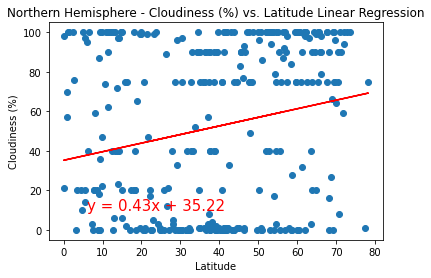

In [19]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_north_cloud_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.64x + 67.13
The r-squared is: 0.22099629359911405
The regression does not display much of a correlation between the data sets.


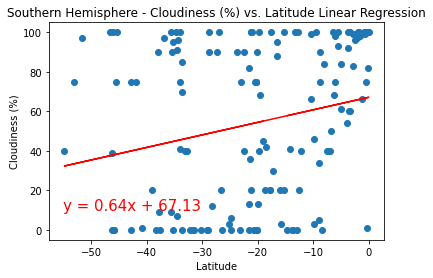

In [20]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_south_cloud_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 2.72
The r-squared is: 0.16267425426165139
The regression does not display much of a correlation between the data sets.


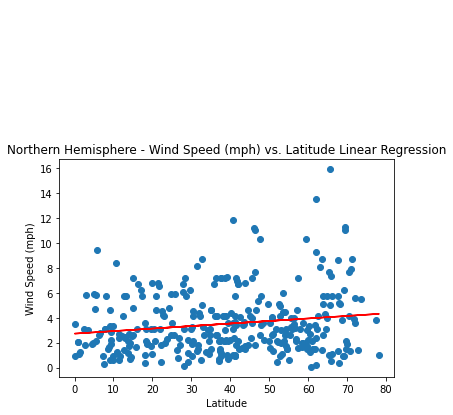

In [21]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_north_wind_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 2.99
The r-squared is: -0.24648158473131684
The regression does not display much of a correlation between the data sets.


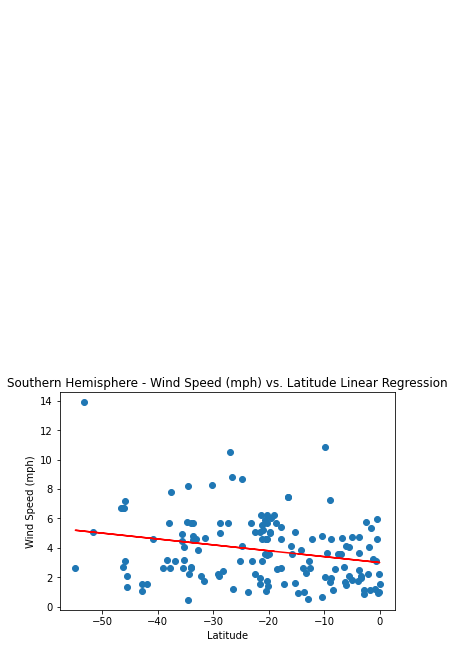

In [22]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_sourth_wind_lat.png")
plt.show()